In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Set the root directory dynamically for Jupyter Notebook
project_root = Path.cwd().parent  # Assuming notebook is in a "Scripts" subfolder
print("Project Root:", project_root)

# Load the datasets
train_data = pd.read_csv(project_root / "data" / "preprocessed_train.csv")
test_data = pd.read_csv(project_root / "data" / "preprocessed_test.csv")

# Inspect the loaded datasets
print("Train Data Head:\n", train_data.head())
print("\nTest Data Head:\n", test_data.head())

Project Root: c:\Users\thomas.hunter\Documents\Python\kaggle_titanic
Train Data Head:
    Survived  Pclass       Age  SibSp  Parch      Fare  Age_Missing  \
0         0       2 -0.565736      1      0 -0.502445            0   
1         1       0  0.663861      1      0  0.786845            0   
2         1       2 -0.258337      0      0 -0.488854            0   
3         1       0  0.433312      1      0  0.420730            0   
4         0       2  0.433312      0      0 -0.486337            0   

   Cabin_Deck  Cabin_Missing  Embarked_Q  Embarked_S  Sex_male  Family_Size  \
0          -1              1           0           1         1            2   
1           2              0           0           0         0            2   
2          -1              1           0           1         0            1   
3           2              0           0           1         0            2   
4          -1              1           0           1         1            1   

   Is_Alone  Fare

In [3]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Define features and target
X = train_data.drop('Survived', axis=1)  # Drop the target column
y = train_data['Survived']  # Target variable

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")


X_train shape: (712, 14), X_val shape: (179, 14)
y_train shape: (712,), y_val shape: (179,)


In [4]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth for interpretability
dt_model.fit(X_train, y_train)

# Predict on Validation Data
y_pred = dt_model.predict(X_val)

In [5]:
# Evaluate Model Performance
accuracy = accuracy_score(y_val, y_pred)
print("Decision Tree Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Decision Tree Accuracy: 0.7877094972067039

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       105
           1       0.86      0.58      0.69        74

    accuracy                           0.79       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.79      0.78       179



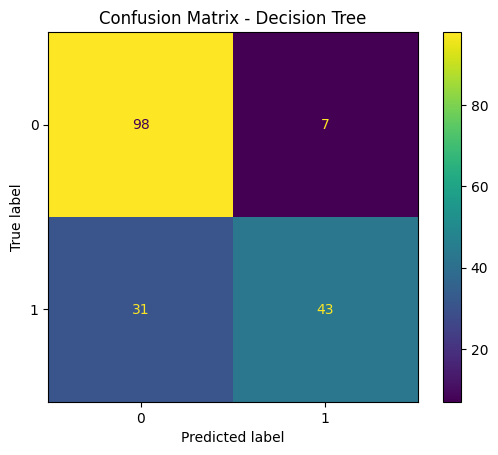

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [7]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

            Feature  Importance
10         Sex_male    0.521250
0            Pclass    0.146052
13  Fare_Per_Person    0.132097
1               Age    0.094283
6        Cabin_Deck    0.041751
2             SibSp    0.041421
4              Fare    0.020932
11      Family_Size    0.002214
3             Parch    0.000000
5       Age_Missing    0.000000
7     Cabin_Missing    0.000000
8        Embarked_Q    0.000000
9        Embarked_S    0.000000
12         Is_Alone    0.000000
